In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
train_df = pd.read_csv("C:/Users/daddi/OneDrive/Bureau/projet_m2/eco_non_lineaire/classification-multi-classes/train.csv", 
                      delimiter = ",",
                      header = 0)

train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [140]:
train_df.shape

(15000, 20)

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

- id : Identifiant unique de chaque patient ou enregistrement. 
- N_Days : Nombre de jours écoulés depuis un événement de référence (par exemple, diagnostic, début du suivi, ou début du traitement). Début du traitement 1986.
- Drug : Nom ou catégorie du médicament administré au patient.
- Age : Âge du patient (probablement en années).
- Sex : Sexe du patient (Male ou Female).
- Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).
- Hepatomegaly : Présence d’hépatomégalie (augmentation du volume du foie). Valeurs possibles : Yes, No, ou NA.
- Spiders : Présence de telangiectasies en araignée (lésions vasculaires cutanées). Valeurs possibles : Yes, No, ou NA.
- Edema : Présence d’œdème. Peut inclure des catégories comme None, Slight, ou Marked.
- Bilirubin : Niveau de bilirubine dans le sang (en mg/dL), un marqueur de la fonction hépatique.
- Cholesterol : Niveau de cholestérol dans le sang (en mg/dL), souvent indicatif d’une santé globale ou de troubles métaboliques.
- Albumin : Niveau d’albumine dans le sang (en g/dL), un marqueur nutritionnel et de la fonction hépatique.
- Copper : Concentration de cuivre dans le sang ou l’urine (en µg/dL), indicateur d’une éventuelle maladie de Wilson ou autre désordre métabolique.
- Alk_Phos : Niveau de phosphatases alcalines (en UI/L), un indicateur de fonction hépatique ou osseuse.
- SGOT : Niveau d'enzymes transaminases (SGOT ou AST) (en UI/L), indicateur de dommages au foie ou à d’autres organes.
- Tryglicerides : Niveau de triglycérides dans le sang (en mg/dL), un marqueur lipidique et métabolique.
- Platelets : Nombre de plaquettes dans le sang (en milliers/μL), un indicateur de la coagulation.
- Prothrombin : Temps de prothrombine (en secondes ou % d’activité), un test de coagulation pour évaluer la fonction hépatique.
- Stage : Stade de la maladie, basé sur un système de classification (souvent de 1 à 4, où 4 est le plus sévère).
- Status : État ou issue du patient. Par exemple : Alive, Deceased, ou autres catégories. (VARIABLE CYBLE)

In [142]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,3.025667
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,0.877796
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000


In [143]:
# Valeur manquante
train_df.isna().sum()/len(train_df)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [144]:
# On constate que les pourcentages de valeurs manquantes sont assez proches pour certaines variables:
# - Ascites, Hepatomegaly, Spiders ont un pourcentage de valeurs manquantes quasiment égal
#   De plus, ces trois varizbles ont la meme structure (yes/no/na)
#   -> il est possible que ce soit les mêmes individus pour lesquels on a des NA (personnes qui n'ont juste 
#   pas repondus ou pas suivi le protocole)
# - Cholesterol, Tryglicerides ont des pourcentages de valeurs manquantes plus élevés que les autre variables
#   -> il s'agirait des meme individus qui n'ont pas suivi le traitement + des individus qui ne connaitraient
#    pas ces taux 

# => en generale les pourcenatge de valeur manquantes sur des variables qui semblent liées entre elles
# => il est possible que ce soit les mêmes individus pour lesquels on a des NA, donc un groupe qui n'aurait 
# pas suivi le protocole 
# IL FAUDRA FAIRE UNE ANALYSE PLUS POUSSEE POUR VOIR SI LES NA SONT PReSENTS SUR LES MEMES INDIVIDUS

* ID :

In [145]:
# supprimer id
train_df.drop(columns='id',inplace = True)

* N_Days :

In [146]:
# Mettre N_Days en int
train_df['N_Days'] = train_df['N_Days'].astype('int')

In [147]:
train_df['N_Days'].describe()
# max abbberant regarder

count    15000.000000
mean      1966.998733
std       1355.897299
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      40795.000000
Name: N_Days, dtype: float64

In [200]:
print(train_df['N_Days'].max()/365)
# Correspondant en années à 111 ans envirront
# Problèmes sur cette valeur (traitement ne peut durer autant de temps)
# De plus, d'apres les recherhes le dataset debute en 1986.
# -> impossible d'avoir des N_days supérieur à :
print((2025-1986)*365)

111.76712328767124
14235


(array([8.620e+02, 1.483e+03, 2.395e+03, 2.037e+03, 1.378e+03, 1.994e+03,
        1.966e+03, 1.035e+03, 8.100e+02, 4.450e+02, 4.330e+02, 1.350e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

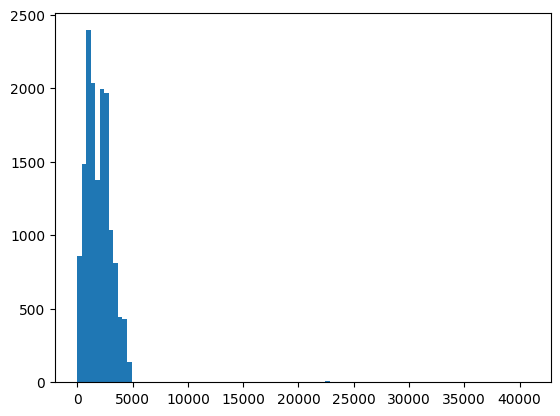

In [85]:
plt.hist(train_df['N_Days'], bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b15c3f9040>,
 'caps': [<matplotlib.lines.Line2D at 0x1b15c3f9550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b15c3f8da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b15c3f9b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b15c3f9df0>],
 'means': []}

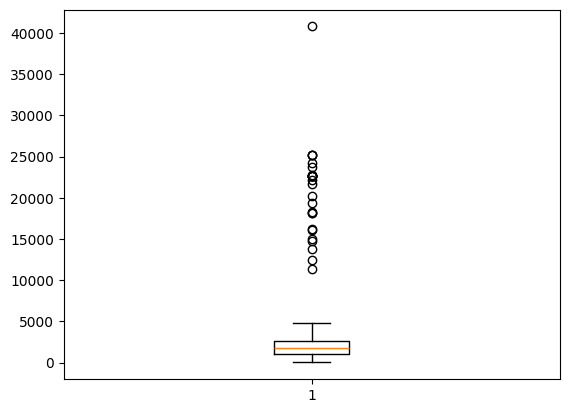

In [86]:
plt.boxplot(train_df['N_Days'])

* Drug : 

In [87]:
train_df['Drug'].describe()

count                8564
unique                  2
top       D-penicillamine
freq                 4568
Name: Drug, dtype: object

In [88]:
train_df['Drug'].value_counts(dropna=False, normalize=True)
# Autant de placebo que de cachets
# Beaucoup de variables manquantes
# Faut il :
# - considérer les NaN comme des valeurs manquantes
# - mettre les NaN en "non-suivi" -> personnes qui n'auraient simplement pas suivi le traitement

Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64

In [89]:
# Si on recode les NaN en "non-suivi" :
train_df['Drug'] = train_df['Drug'].fillna('non-suivi').astype(str)


In [90]:
from collections import Counter
frequencies = Counter(train_df['Drug'])
frequencies

Counter({'non-suivi': 6436, 'D-penicillamine': 4568, 'Placebo': 3996})

In [91]:
labels = list(frequencies.keys())
values = list(frequencies.values()) 

<BarContainer object of 3 artists>

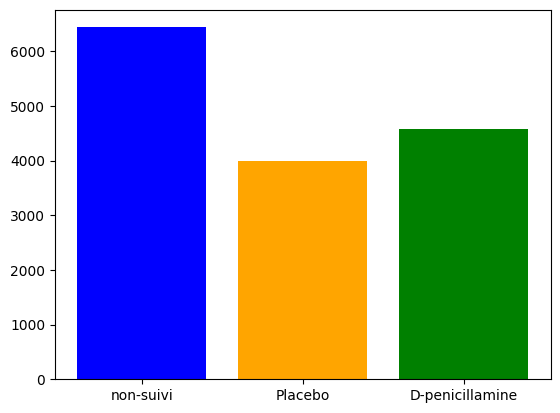

In [92]:
plt.bar(labels, values, color=['blue', 'orange', 'green'])

* Age : 

In [93]:
train_df['Age'].describe()
# valeur minimale extremement petite

count    15000.000000
mean     19248.502373
std       3697.546749
min        133.300000
25%      16374.000000
50%      19544.000000
75%      22369.000000
max      35472.000000
Name: Age, dtype: float64

In [94]:
train_df[train_df['Age']<train_df['N_Days']]
# problème à ce niveau car il est imossible d'avoir un age inferieur au nombre de jour de traitement
# on constate que ce problème est lié aux valeurs(abberantes) minimales
# les supprimer

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,2995,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,2504,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,3445,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,13728,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,40795,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [95]:
train_df.drop(train_df[train_df['Age'] < train_df['N_Days']].index, inplace=True)

In [96]:
train_df[train_df['Age']<train_df['N_Days']]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [97]:
# probleme avec age qui est en jour
train_df['Age'] = round(train_df['Age'] / 365, 0)

In [98]:
# age mettre en int
train_df['Age'] = train_df['Age'].astype('int')

(array([4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+01, 1.080e+02, 4.780e+02, 7.030e+02, 7.130e+02,
        1.105e+03, 1.159e+03, 1.190e+03, 1.966e+03, 2.038e+03, 1.179e+03,
        1.334e+03, 1.613e+03, 7.300e+02, 5.230e+02, 1.120e+02, 1.400e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 3.        ,  6.13333333,  9.26666667, 12.4       , 15.53333333,
        18.66666667, 21.8       , 24.93333333, 28.06666667, 31.2       ,
        34.33333333, 37.46666667, 40.6       , 43.73333333, 46.86666667,
        50.        , 53.13333333, 56.26666667, 59.4       , 62.53333333,
        65.66666667, 68.8       , 71.93333333, 75.06666667, 78.2       ,
        81.33333333, 84.46666667, 87.6       , 90.73333333, 93.86666667,
        97.        ]),
 <BarContainer object of 30 artists>)

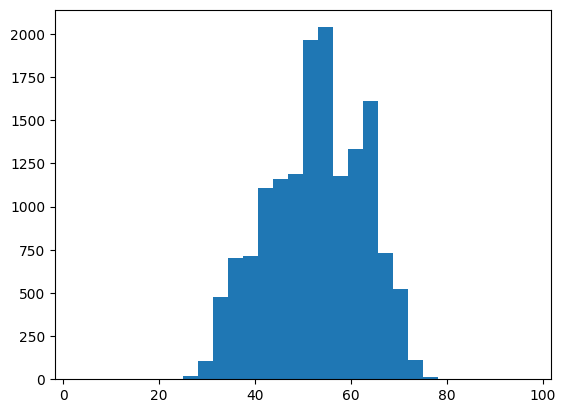

In [99]:
plt.hist(train_df['Age'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b15c8befc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b15c8bf5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b15c8becf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b15c8bfa40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b15c8bfce0>],
 'means': []}

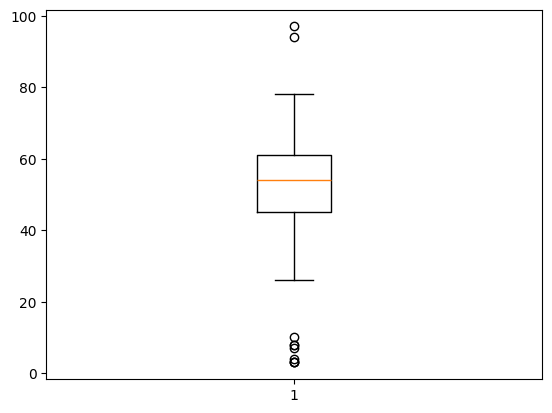

In [100]:
plt.boxplot(train_df['Age'])

In [101]:
# On remarque toujours la présence de valeurs très petites pour l'âge
# possible que l'étude ait été faite sur des enfants mais se renseigner quand meme 

In [102]:
train_df['Age'].min()
# 3 ans est ce un age convenable ou trop jeune ?

np.int64(3)

* Sex :

In [105]:
train_df['Sex'].describe()


count     14995
unique        2
top           F
freq      14398
Name: Sex, dtype: object

In [107]:
train_df['Sex'].value_counts(dropna=False, normalize=True) 
# Prendre en compte dans l'analyse que 97% des individus sont des femmes 

Sex
F    0.960187
M    0.039813
Name: proportion, dtype: float64

* Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).

In [108]:
train_df['Ascites'].describe()

count     8558
unique       4
top          N
freq      8174
Name: Ascites, dtype: object

In [110]:
train_df['Ascites'].value_counts(dropna=False, normalize=True)

Ascites
N                  0.545115
NaN                0.429276
Y                  0.025475
S                  0.000067
D-penicillamine    0.000067
Name: proportion, dtype: float64

In [120]:
# parfois on a des cases vides, ou des cases avec 'NA', 'None', 'nan' mais Python les détecte 
# pas toujours de la même façon
# je fais la somme des NA et des colonnes non nulles pour m'en assurer
def case_vide (var):
    print("NA : ", train_df[var].isna().sum())
    print("Notnull : ", train_df[var].notnull().sum())
    print("vide : ", len (train_df) - (train_df[var].isna().sum() + train_df[var].notnull().sum()))

case_vide('Ascites')

NA :  6437
Notnull :  8558
vide :  0


In [124]:
# regarder les valeurs où on a la modalité S et D-penicillamine:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]

# savoir si ces deux modalités sont des modalités rares -> si c'est le cas important de les prendre en compte
# savoir si l'individu c'est trompé de réponse -> si c'est le cas : (l'individu semble s'etre plutot trompé)
# - soit supprimer ces variables, 
# - soit les mettre en une autre modalité

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6245,552,Placebo,61,F,S,Y,Y,S,3.6,375.0,3.35,4.0,1110.0,96.1,432.0,354.0,12.4,2,D
7046,3239,D-penicillamine,56,F,D-penicillamine,N,N,N,0.6,271.0,3.80,210.0,6456.2,120.9,55.0,467.0,11.0,3,C


* Stage : 

In [104]:
# stage mettre en int
train_df['Stage'] = train_df['Stage'].astype('int')

In [149]:
train_df['Stage'].value_counts()

Stage
3.0    5644
4.0    5239
2.0    3380
1.0     737
Name: count, dtype: int64

* Status

In [103]:
# visualisation de la variable cible :
train_df['Status'].value_counts()
# les classes sont déséquilibrées 
# en tenir compte 

Status
C     10046
D      4558
CL      391
Name: count, dtype: int64

In [179]:
# Affichage de toutes les variables catégorielles en fonction de la variable cible : 

In [151]:
import seaborn as sns

In [169]:
var_categorielles = list(train_df.select_dtypes(include="object").columns)
var_categorielles

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

In [173]:
def plot_var_categorielles(var_categorielles, train_df):
    place=1
    for var in var_categorielles[:-1] :
        cross_tab = train_df.groupby([var, "Status"]).size().reset_index(name="Count")
        plt.figure(figsize=(21.2,10))
        plt.subplot(2,3,place)
        sns.barplot(x=var, y="Count", hue="Status", data=cross_tab)
        plt.title(f"Répartition de Status selon {var}")
        plt.xlabel(var)
        plt.ylabel("Nombre d'occurrences")
        plt.legend(title="Status")
        plt.show()
        place +=1

In [177]:
def plot_var_categorielles(var_categorielles, train_df):
    # Définir la taille de la figure principale
    num_vars = len(var_categorielles)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(var_categorielles[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        cross_tab = train_df.groupby([var, "Status"]).size().reset_index(name="Count")
        
        # Ajouter un sous-graphe
        plt.subplot(rows, 3, i)
        sns.barplot(x=var, y="Count", hue="Status", data=cross_tab)
        plt.title(f"Répartition de Status selon {var}")
        plt.xlabel(var)
        plt.ylabel("Nombre d'occurrences")
        plt.legend(title="Status")
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()


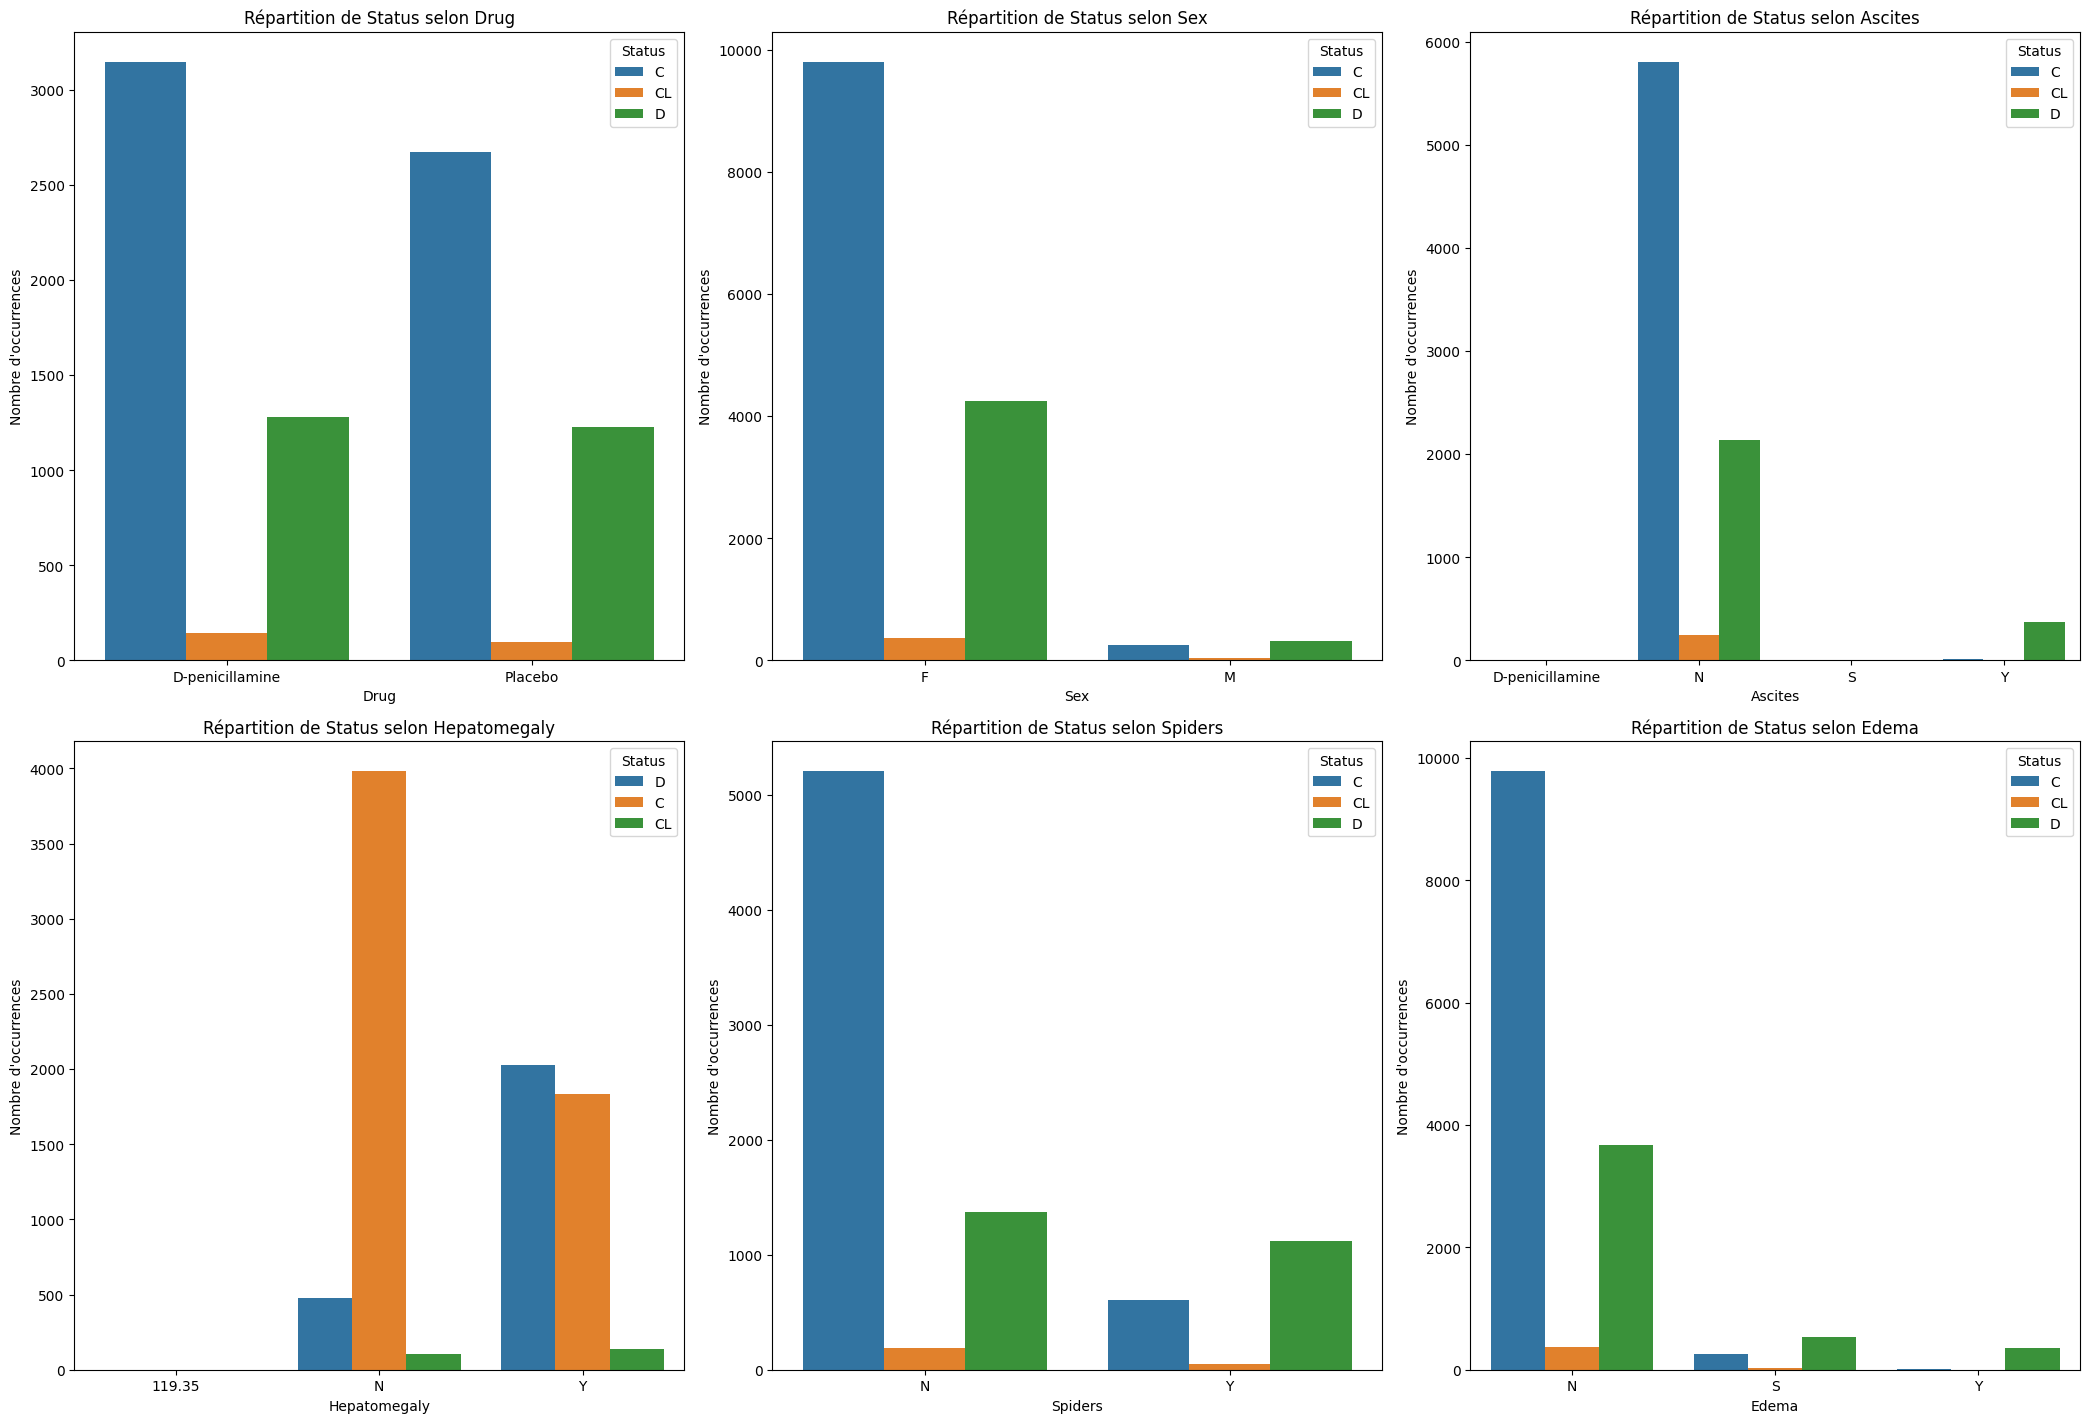

In [178]:
plot_var_categorielles(var_categorielles, train_df)

In [ ]:
# Affichage de toutes les variables continues en fonction de la variable cible : 

In [181]:
var_continues = list(train_df.select_dtypes(include=["int","float"]).columns)

In [193]:
def plot_var_continues(var_continues, train_df, hue_var="Status"):
    # Définir la taille de la figure principale
    num_vars = len(var_continues)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(var_continues[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        plt.subplot(rows, 3, i)
        
        # Tracer le kdeplot
        sns.kdeplot(
            data=train_df, 
            x=var, 
            hue=hue_var, 
            fill=True, 
            palette="Purples", 
            common_norm=True
        )
        sns.despine(top=True, right=True, bottom=True, left=True)  # Supprime les cadres inutiles
        plt.tick_params(axis="both", which="both", bottom=False, top=False, left=False)
        plt.xlabel("")  # Supprimer les labels des x
        plt.title(var, fontsize=14)  # Ajouter un titre pour chaque graphique
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()


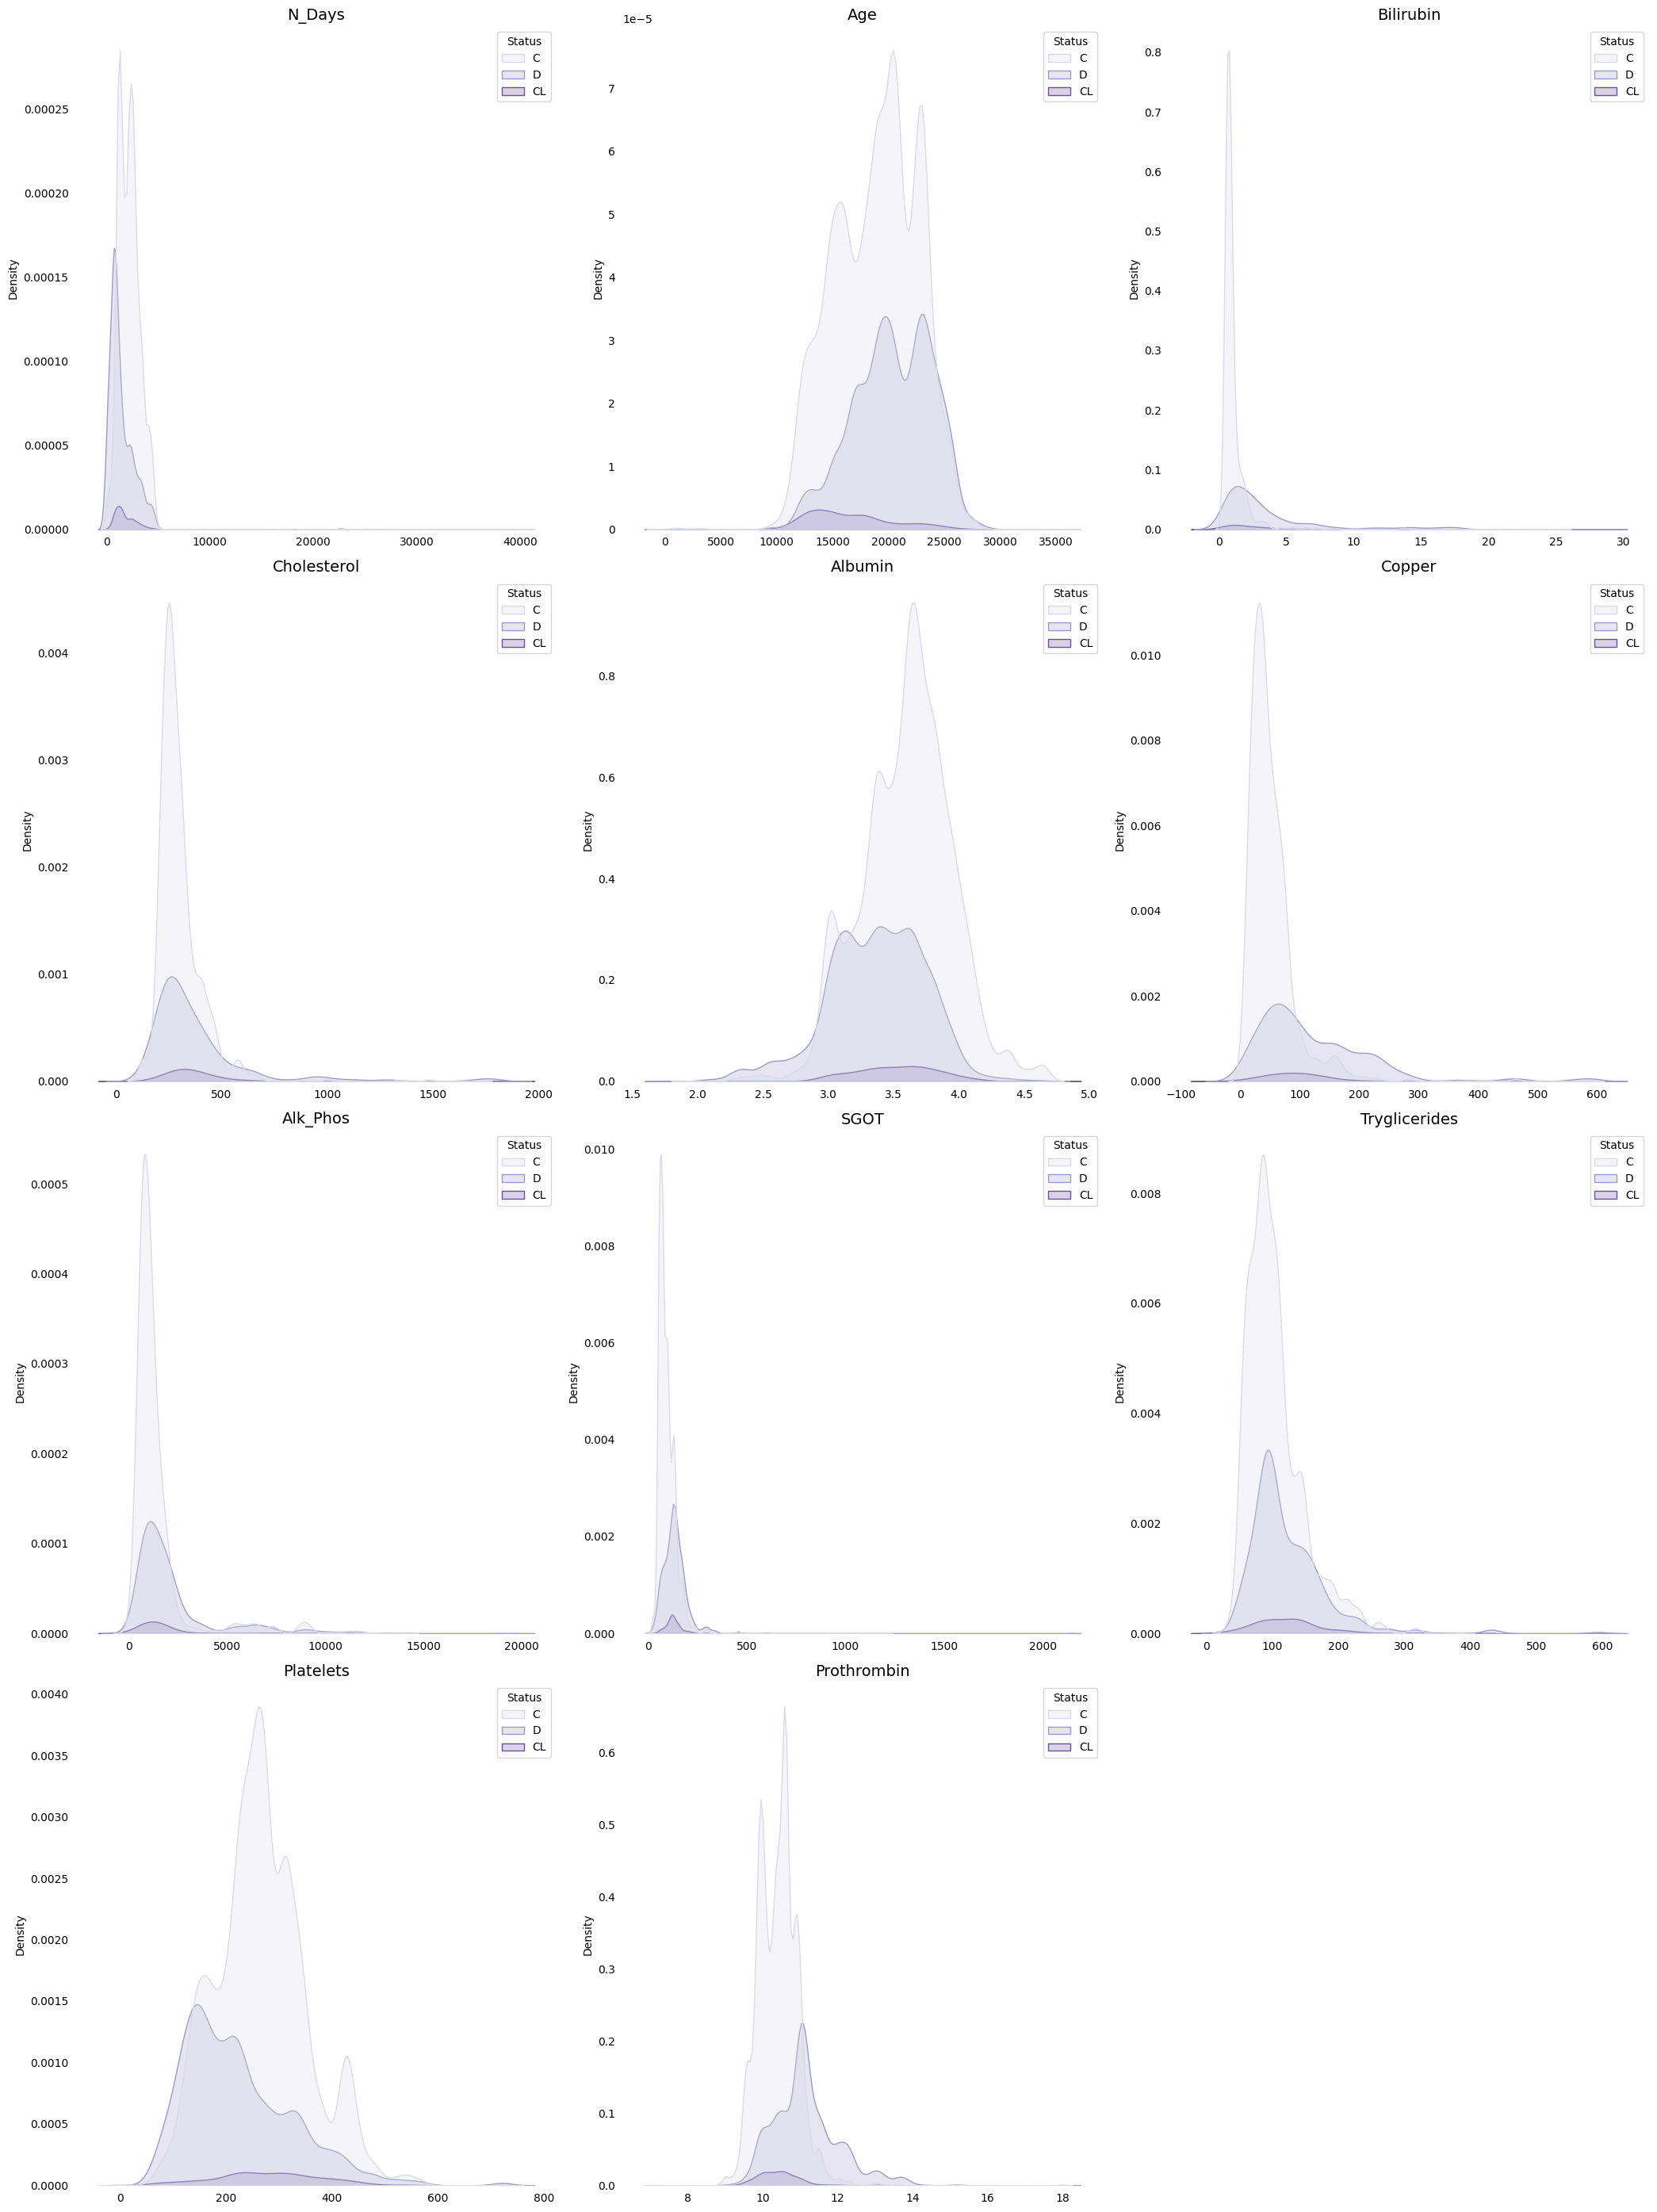

In [194]:
plot_var_continues(var_continues, train_df, hue_var="Status")

In [195]:
def boxplot_var_continues(var_continues, train_df):
    # Définir la taille de la figure principale
    num_vars = len(var_continues)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(var_continues[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        plt.subplot(rows, 3, i)
        
        # Utilisation d'un boxplot
        sns.boxplot(x="Status", y=var, data=train_df)
        plt.title(f"Distribution de {var} selon Status")
        plt.xlabel("Status")
        plt.ylabel(var)
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()


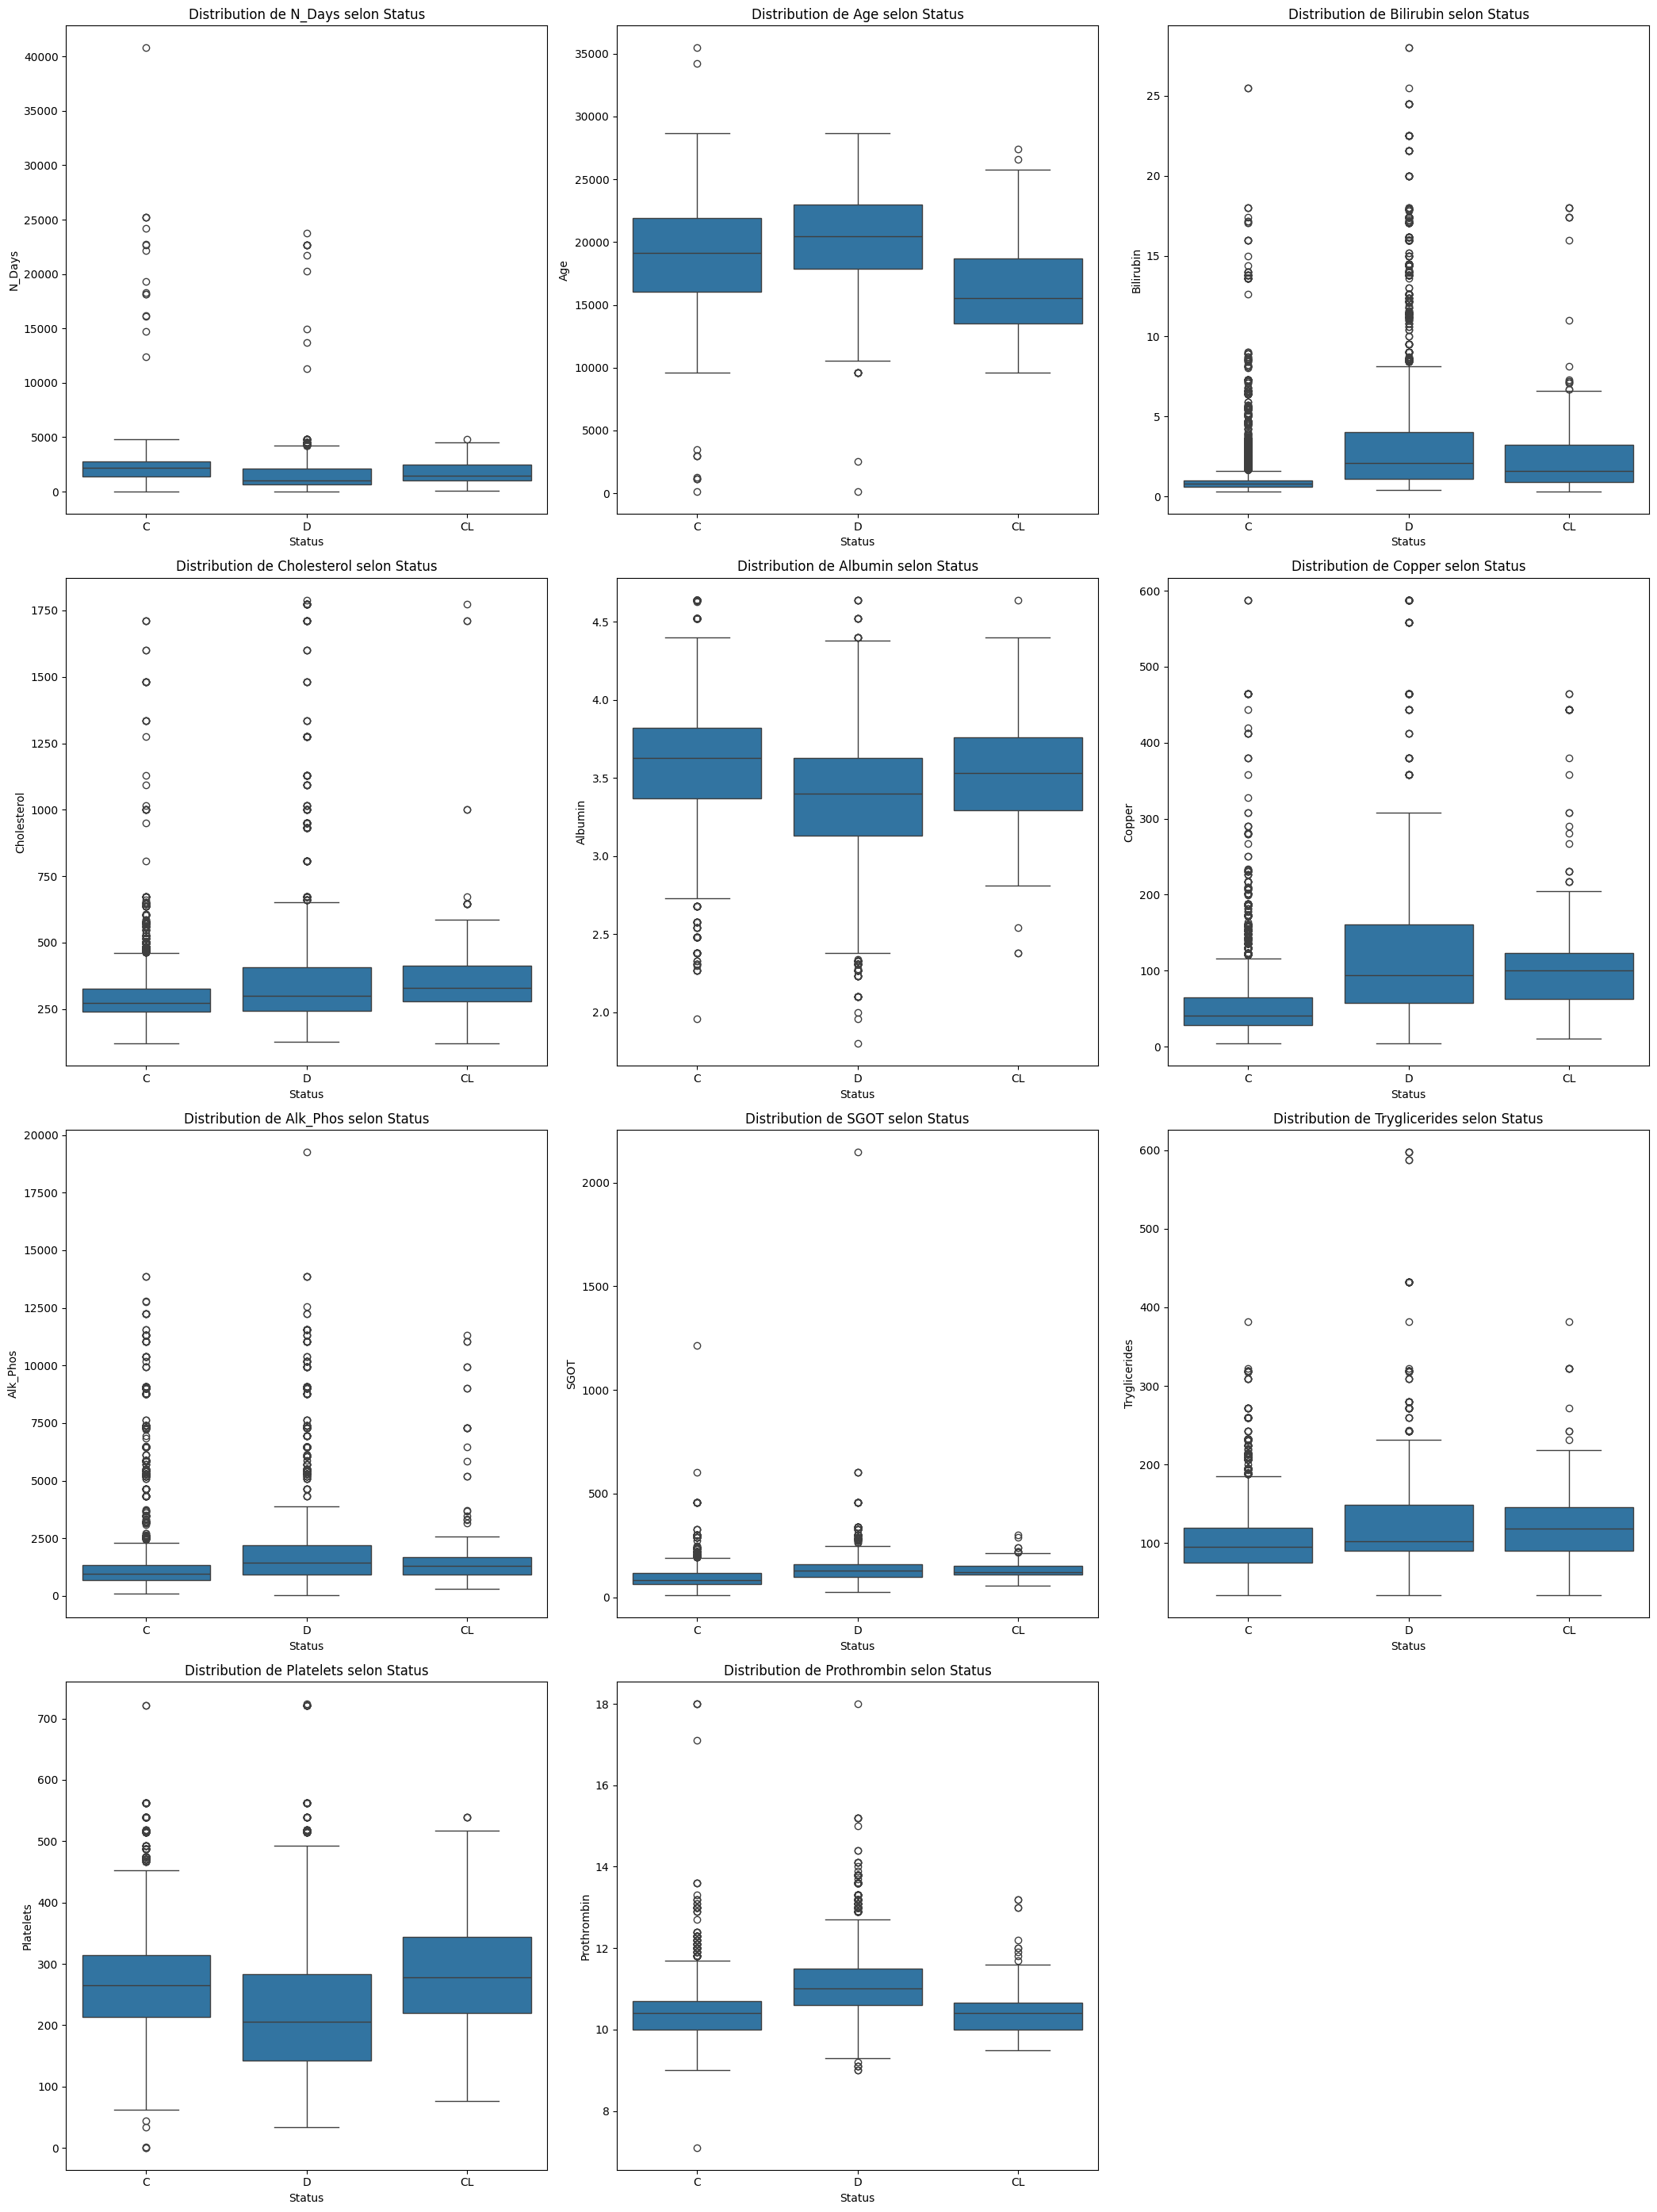

In [196]:
boxplot_var_continues(var_continues, train_df)

##### Regarder si les NaN sont presents sur les meme individus

In [ ]:
multiple_missing = train_df.isna().sum(axis=1) > 5 
train_df[multiple_missing]


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1055,non-suivi,54,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3,C
2,1653,non-suivi,56,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2,C
4,2202,non-suivi,49,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3,C
7,778,non-suivi,62,F,NaN,NaN,NaN,N,0.8,NaN,3.48,NaN,NaN,NaN,NaN,190.0,11.1,4,D
11,1367,non-suivi,39,F,NaN,NaN,NaN,N,0.6,NaN,3.00,NaN,NaN,NaN,NaN,255.0,10.8,3,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,2011,non-suivi,64,F,NaN,NaN,NaN,N,1.8,NaN,3.26,NaN,NaN,NaN,NaN,139.0,10.3,2,D
14992,943,non-suivi,52,F,NaN,NaN,NaN,N,0.8,NaN,3.64,NaN,NaN,NaN,NaN,256.0,10.6,3,C
14994,2149,non-suivi,53,F,NaN,NaN,NaN,N,0.6,NaN,3.83,NaN,NaN,NaN,NaN,350.0,10.6,3,C
14998,4453,non-suivi,49,F,NaN,NaN,NaN,N,2.1,NaN,3.63,NaN,NaN,NaN,NaN,233.0,11.0,4,D


* Méthode 1 :

In [201]:
# Méthode 1 :
for i in range(1,19):
    multiple_missing = train_df.isna().sum(axis=1) > i
    print (len(train_df[multiple_missing]), "individus qui ont", i, "colonnes de variables manquantes")

8331 individus qui ont 1 colonnes de variables manquantes
6522 individus qui ont 2 colonnes de variables manquantes
6449 individus qui ont 3 colonnes de variables manquantes
6447 individus qui ont 4 colonnes de variables manquantes
6444 individus qui ont 5 colonnes de variables manquantes
6444 individus qui ont 6 colonnes de variables manquantes
6441 individus qui ont 7 colonnes de variables manquantes
6407 individus qui ont 8 colonnes de variables manquantes
354 individus qui ont 9 colonnes de variables manquantes
1 individus qui ont 10 colonnes de variables manquantes
0 individus qui ont 11 colonnes de variables manquantes
0 individus qui ont 12 colonnes de variables manquantes
0 individus qui ont 13 colonnes de variables manquantes
0 individus qui ont 14 colonnes de variables manquantes
0 individus qui ont 15 colonnes de variables manquantes
0 individus qui ont 16 colonnes de variables manquantes
0 individus qui ont 17 colonnes de variables manquantes
0 individus qui ont 18 colonnes

* Méthode 2 :

In [211]:
# On récupère seulement les variables avec des valeurs manquantes :
train_df_na = train_df.loc[:, train_df.isna().sum() != 0]
train_df_na

,Drug,Ascites,Hepatomegaly,Spiders,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,10.5
1,Placebo,N,Y,Y,309.0,96.0,1142.0,71.30,106.0,240.0,12.4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,9.5
3,D-penicillamine,N,Y,N,498.0,89.0,1601.0,164.30,85.0,394.0,9.7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...
14995,Placebo,N,N,Y,322.0,52.0,1257.0,60.45,213.0,228.0,9.9
14996,D-penicillamine,Y,Y,N,NaN,18.0,976.0,97.65,NaN,126.0,11.0
14997,Placebo,N,Y,Y,348.0,464.0,933.0,120.00,146.0,322.0,10.6
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,11.0


In [212]:
# Créer une matrice binaire pour les valeurs manquantes
missing_matrix = train_df_na.isnull().astype(int)
missing_matrix

,Drug,Ascites,Hepatomegaly,Spiders,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,1,1,1,1,1,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,1,0,0,0,1,0,0
14997,0,0,0,0,0,0,0,0,0,0,0
14998,1,1,1,1,1,1,1,1,1,0,0


In [213]:
# Calculer la corrélation entre colonnes de valeurs manquantes
correlation_matrix = missing_matrix.corr()
correlation_matrix

,Drug,Ascites,Hepatomegaly,Spiders,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Drug,1.000000,0.996598,0.997823,0.998504,0.775353,0.984092,0.998368,0.998776,0.770464,0.054619,0.048067
Ascites,0.996598,1.000000,0.996598,0.997824,0.775459,0.983411,0.997143,0.997552,0.770569,0.055286,0.048061
Hepatomegaly,0.997823,0.996598,1.000000,0.998232,0.775353,0.983820,0.998368,0.998504,0.770464,0.054619,0.048067
Spiders,0.998504,0.997824,0.998232,1.000000,0.776304,0.985299,0.999048,0.999456,0.771410,0.054365,0.048008
Cholesterol,0.775353,0.775459,0.775353,0.776304,1.000000,0.771821,0.775987,0.776304,0.993125,0.021836,0.037282
Copper,0.984092,0.983411,0.983820,0.985299,0.771821,1.000000,0.984896,0.985299,0.767133,0.051472,0.047342
Alk_Phos,0.998368,0.997143,0.998368,0.999048,0.775987,0.984896,1.000000,0.999592,0.771095,0.054450,0.048028
SGOT,0.998776,0.997552,0.998504,0.999456,0.776304,0.985299,0.999592,1.000000,0.771410,0.054365,0.048008
Tryglicerides,0.770464,0.770569,0.770464,0.771410,0.993125,0.767133,0.771095,0.771410,1.000000,0.019408,0.037086
Platelets,0.054619,0.055286,0.054619,0.054365,0.021836,0.051472,0.054450,0.054365,0.019408,1.000000,-0.000130


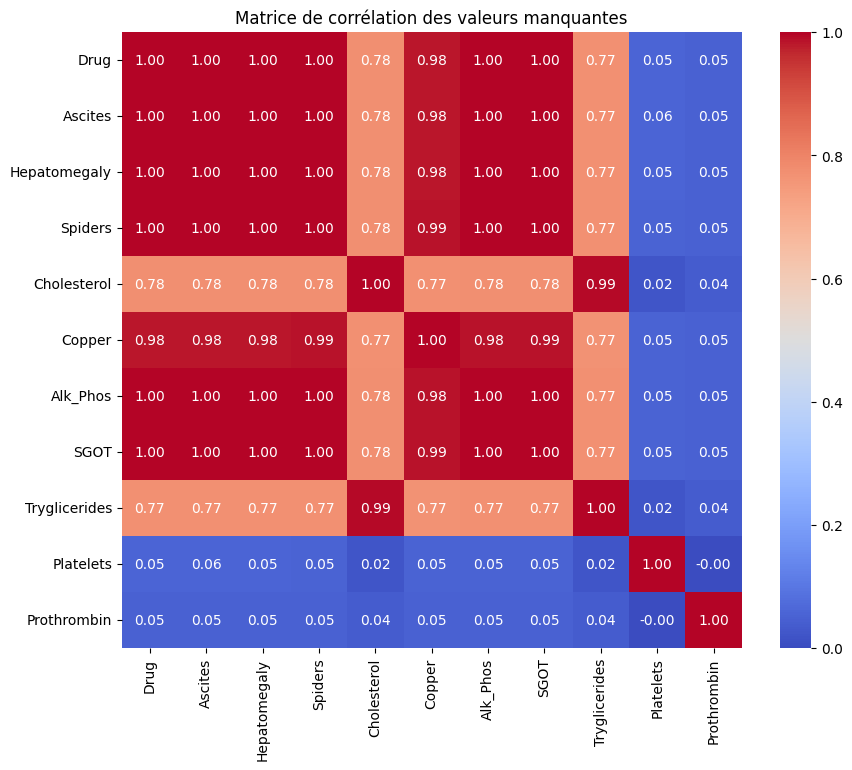

In [214]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des valeurs manquantes")
plt.show()

In [ ]:
# Librairie qui fait directement les correletions sur les valeurs manquantes

In [221]:
import missingno as msno

<Axes: >

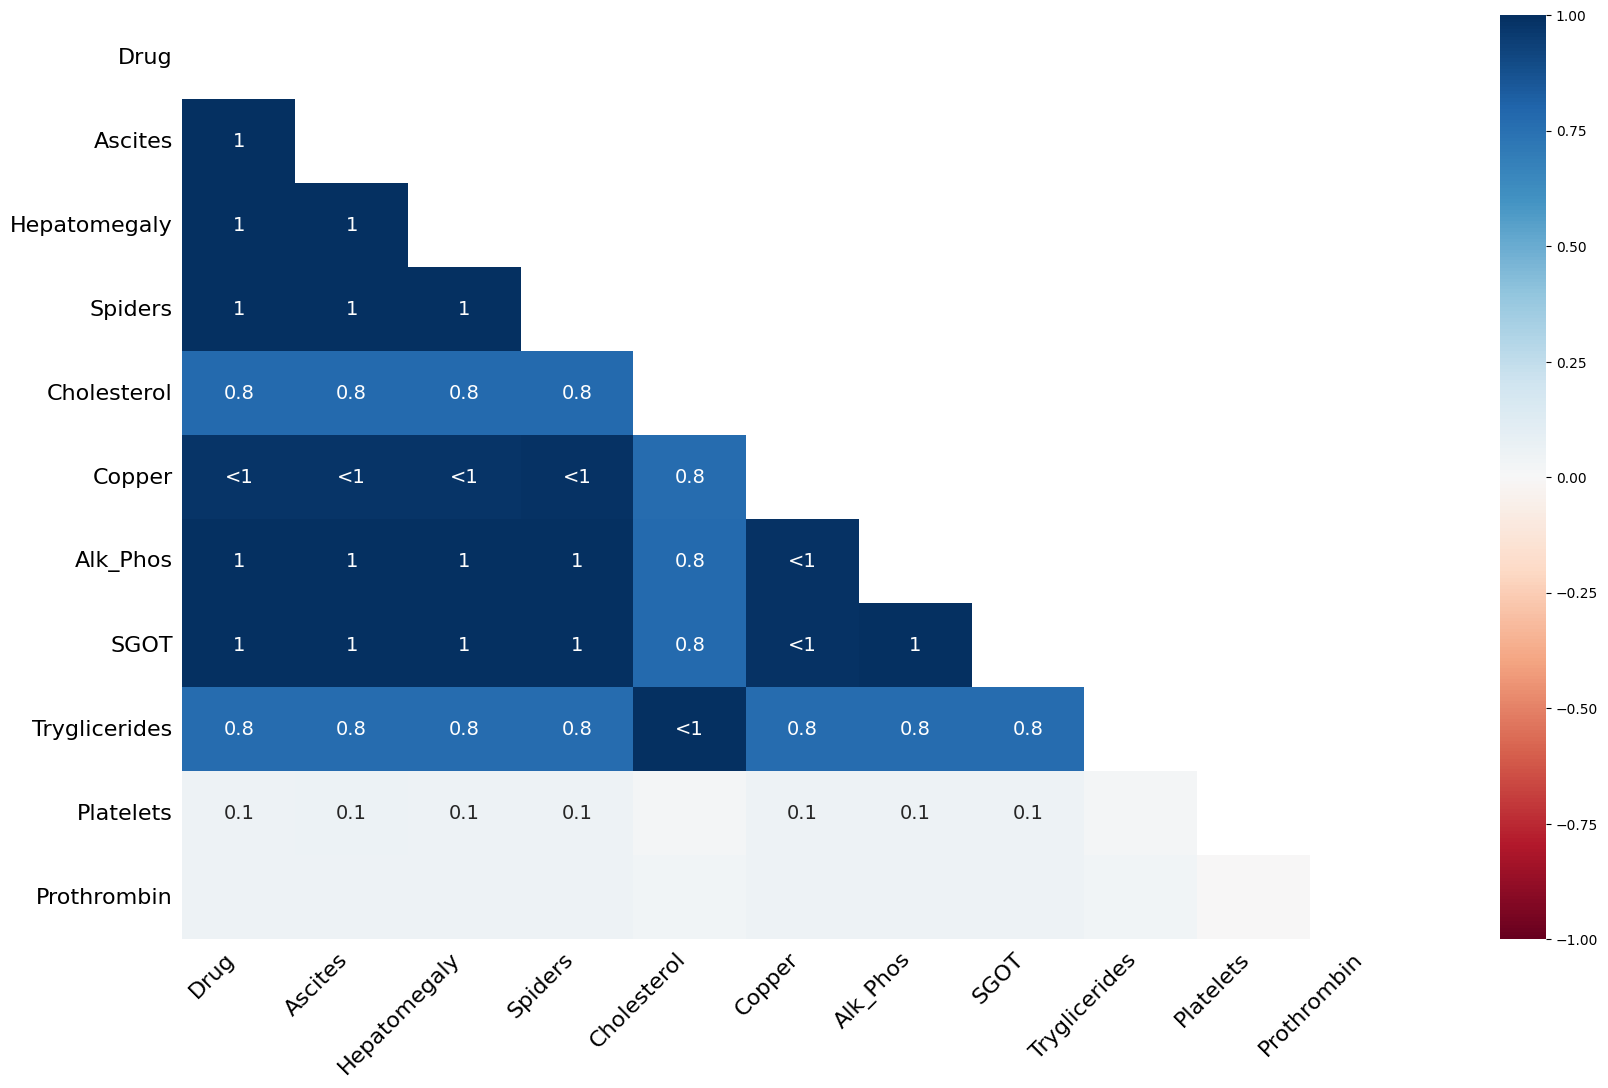

In [223]:
msno.heatmap(train_df_na)


<Axes: >

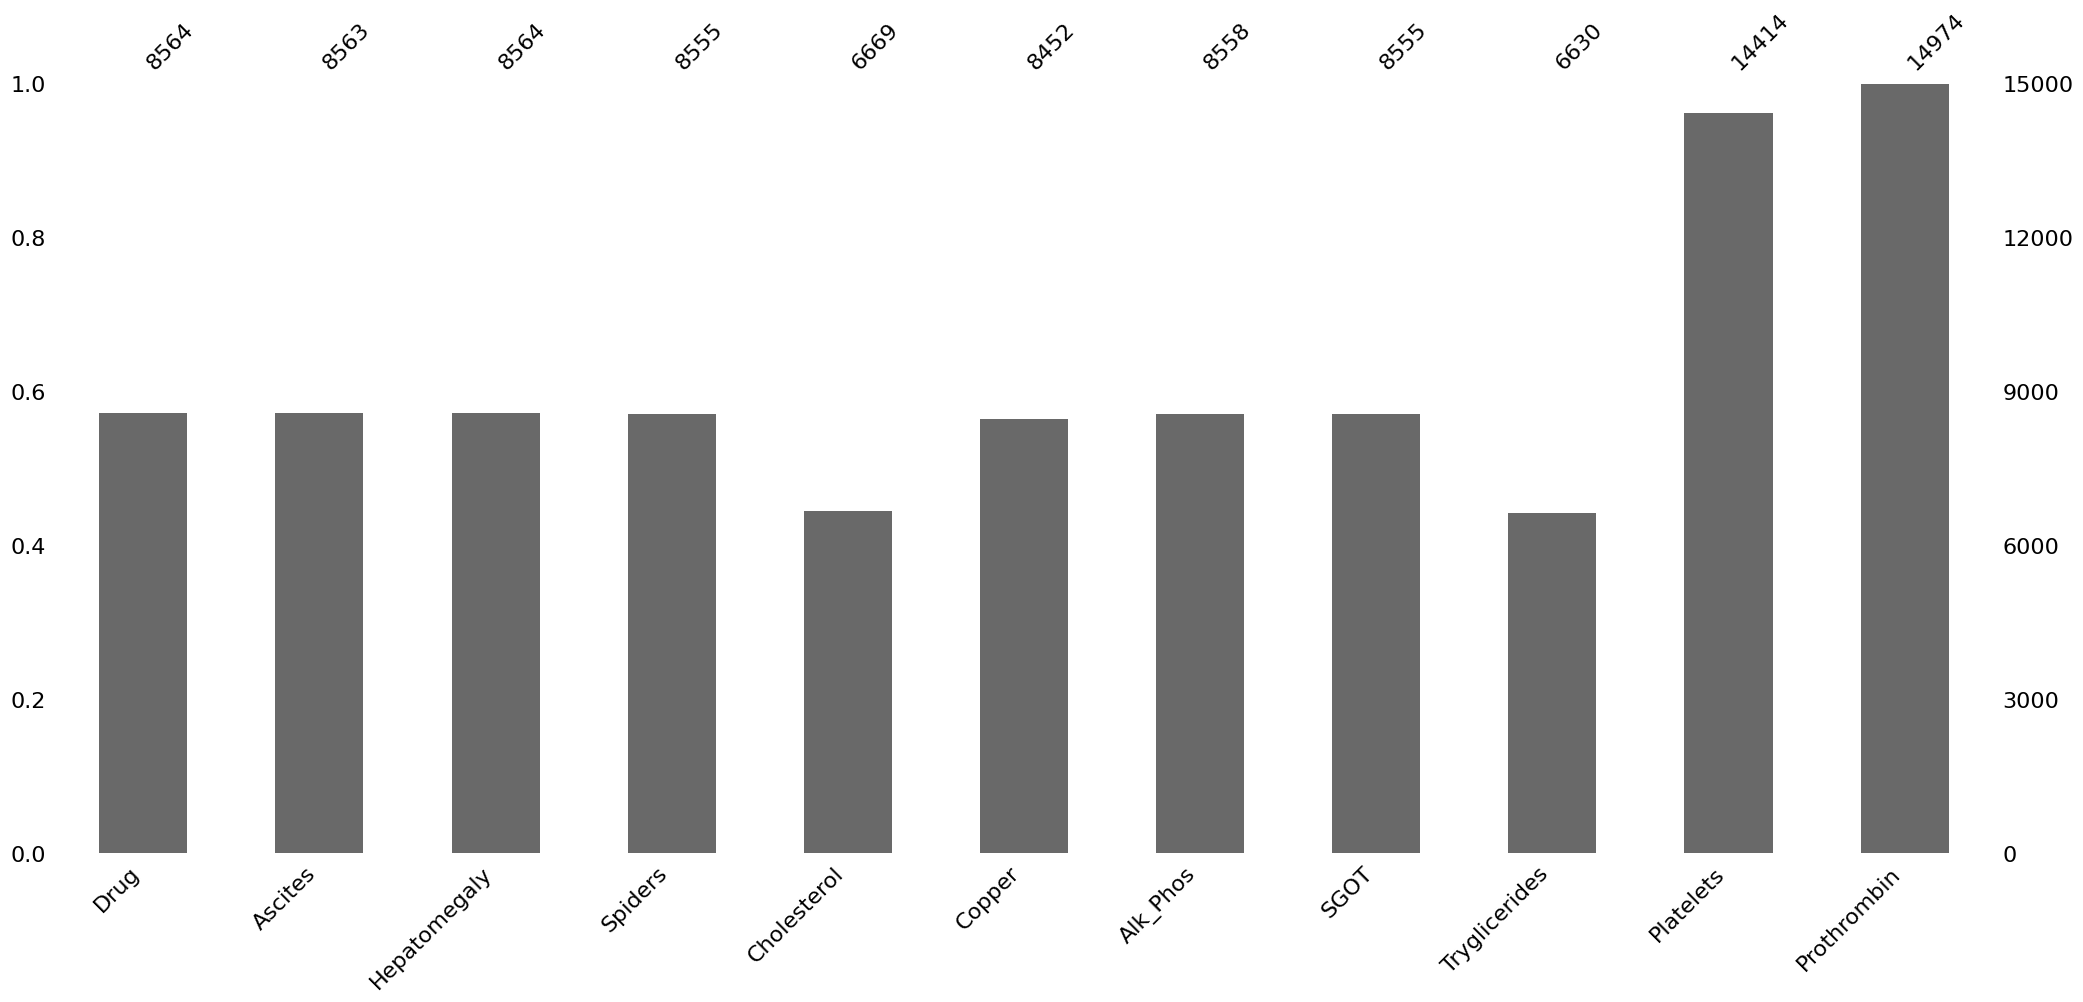

In [224]:
msno.bar(train_df_na)